<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-problem" data-toc-modified-id="The-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The problem</a></span></li><li><span><a href="#Data-exporation" data-toc-modified-id="Data-exporation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exporation</a></span></li><li><span><a href="#The-linear-model" data-toc-modified-id="The-linear-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The linear model</a></span><ul class="toc-item"><li><span><a href="#Understanding-the-model-error-as-a-function-of-parameters-m-and-n" data-toc-modified-id="Understanding-the-model-error-as-a-function-of-parameters-m-and-n-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Understanding the model error as a function of parameters <code>m</code> and <code>n</code></a></span></li></ul></li><li><span><a href="#The-optimal-linear-model" data-toc-modified-id="The-optimal-linear-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The optimal linear model</a></span><ul class="toc-item"><li><span><a href="#Understanding-lr-attributes-/-methods" data-toc-modified-id="Understanding-lr-attributes-/-methods-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Understanding lr attributes / methods</a></span></li></ul></li><li><span><a href="#Align-with-business-to-decide-the-optimal-metric!!" data-toc-modified-id="Align-with-business-to-decide-the-optimal-metric!!-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Align with business to decide the optimal metric!!</a></span></li></ul></div>

# Linear regression motivation

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

## The problem

In [2]:
data = pd.read_csv("../datasets/hours_vs_mark.csv", index_col=0)

We have 100 students, and we know:
 * how many hours they studied for their exam
 * what mark they got (0 to 100)

In [3]:
data.head(10)

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86
5,560,40
6,367,26
7,861,73
8,59,20
9,514,85


In [4]:
data.sample(5)

,hours,mark
75,134,36
81,491,37
4,682,86
26,152,23
35,518,54


In [5]:
data.corr()

,hours,mark
hours,1.000000,0.867072
mark,0.867072,1.000000


We would like to understand the relationship $$mark = f(hours)$$

So that we can **predict the expected mark** we will get by studying a given number of hours

## Data exporation

<AxesSubplot:xlabel='hours', ylabel='Count'>

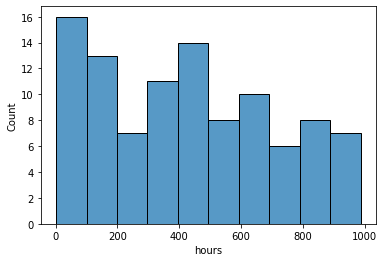

In [6]:
sns.histplot(data.hours, bins=10)

<AxesSubplot:xlabel='mark', ylabel='Count'>

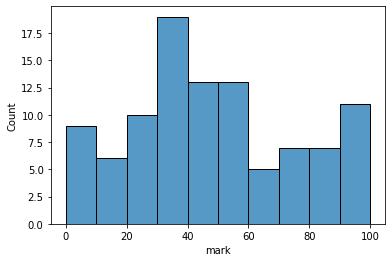

In [7]:
sns.histplot(data.mark, bins=10)

<AxesSubplot:xlabel='hours', ylabel='mark'>

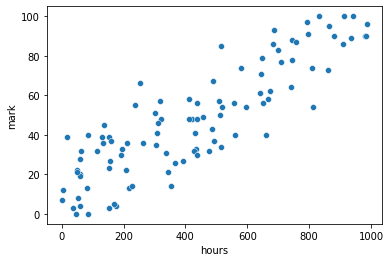

In [8]:
sns.scatterplot(x=data["hours"], y=data["mark"])

## The linear model

Lets try a linear regression $$Y = m * X + n$$

$m$ is the slope  
$n$ is the value of $Y$ when $X=0$ 

$$mark = m * hours + n$$

We want to find $m$ and $n$ that *best* model our data

Lets guess:

$$mark = 0.10*hours + 5$$

$$mark_2 =0.09*hours + 10$$

Which model performs better?

In [10]:
data.shape

(100, 2)

In [9]:
data.head()

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


In [11]:
data["prediction_1"] = 0.1 * data.hours + 5

In [12]:
data["prediction_2"] = 0.09 * data.hours + 10

In [13]:
data.head(10)

,hours,mark,prediction_1,prediction_2
0,865,95,91.5,87.85
1,4,12,5.4,10.36
2,305,35,35.5,37.45
3,437,56,48.7,49.33
4,682,86,73.2,71.38
5,560,40,61.0,60.40
6,367,26,41.7,43.03
7,861,73,91.1,87.49
8,59,20,10.9,15.31
9,514,85,56.4,56.26


In [14]:
# semi-random prediction
data["prediction_3"] = np.random.uniform(40, 60, size=data.shape[0]).round(2)

In [15]:
data.head(10)

,hours,mark,prediction_1,prediction_2,prediction_3
0,865,95,91.5,87.85,55.63
1,4,12,5.4,10.36,50.94
2,305,35,35.5,37.45,59.45
3,437,56,48.7,49.33,41.59
4,682,86,73.2,71.38,47.14
5,560,40,61.0,60.40,54.05
6,367,26,41.7,43.03,56.43
7,861,73,91.1,87.49,49.85
8,59,20,10.9,15.31,46.39
9,514,85,56.4,56.26,43.15


Lets measure error of both models

Lets compute **Mean squared error**, which:
 - Turns every deviation positive (square power)
 - Penalizes specially big deviations (deviation of 3 is 9 times worse than deviation of 1)

In [16]:
data['error_1'] = (data.mark - data.prediction_1) ** 2

In [17]:
data['error_2'] = (data.mark - data.prediction_2)  ** 2

In [18]:
data['error_3'] = (data.mark - data.prediction_3) ** 2

In [19]:
data.head(10)

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,91.5,87.85,55.63,12.25,51.1225,1549.9969
1,4,12,5.4,10.36,50.94,43.56,2.6896,1516.3236
2,305,35,35.5,37.45,59.45,0.25,6.0025,597.8025
3,437,56,48.7,49.33,41.59,53.29,44.4889,207.6481
4,682,86,73.2,71.38,47.14,163.84,213.7444,1510.0996
5,560,40,61.0,60.40,54.05,441.00,416.1600,197.4025
6,367,26,41.7,43.03,56.43,246.49,290.0209,925.9849
7,861,73,91.1,87.49,49.85,327.61,209.9601,535.9225
8,59,20,10.9,15.31,46.39,82.81,21.9961,696.4321
9,514,85,56.4,56.26,43.15,817.96,825.9876,1751.4225


In [20]:
data.error_1.mean()

208.9816

In [21]:
data.error_2.mean()

192.25725599999998

In [22]:
data.error_3.mean()

870.958415

Considering Mean Squared Error criteria, model 2 performs better!

Lets for a moment consider another criteria:   If pred and real distance is less than 5, good. Otherwise, bad

In [30]:
data["error_1_bis"] = (data.mark - data.prediction_1).abs() < 5

In [31]:
data["error_2_bis"] = (data.mark - data.prediction_2).abs() < 5

In [32]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis
0,865,95,91.5,87.85,55.63,12.25,51.1225,1549.9969,True,False
1,4,12,5.4,10.36,50.94,43.56,2.6896,1516.3236,False,True
2,305,35,35.5,37.45,59.45,0.25,6.0025,597.8025,True,True
3,437,56,48.7,49.33,41.59,53.29,44.4889,207.6481,False,False
4,682,86,73.2,71.38,47.14,163.84,213.7444,1510.0996,False,False


In [33]:
data.error_1_bis.sum()

21

In [34]:
data.error_2_bis.sum()

23

This alternative metric would choose also model 2

Lets plot our models

$$mark = 0.1*hours + 5$$

$$mark_2 =0.09*hours + 10$$

In [36]:
%matplotlib notebook

<IPython.core.display.Javascript object>


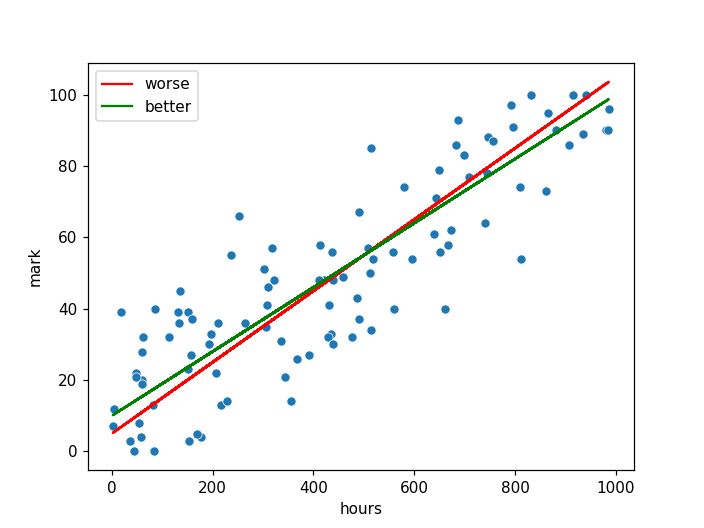

In [37]:
fig, ax = plt.subplots()
sns.scatterplot(x=data["hours"], y=data["mark"])

plt.plot(data.hours, data.prediction_1, color='r', label='worse')
plt.plot(data.hours, data.prediction_2, color='g', label='better')

plt.legend()

### Understanding the model error as a function of parameters `m` and `n`

$$mark = m * hours + n$$

`L` stands for loss (word used for "error" in Data Science literature)

$$\text{model_error} = L(m, n)$$

$$mark = 0.1*hours + 5$$

$$L(0.10, 5) = 208$$

$$mark_2 =0.09*hours + 10$$

$$L(0.09, 10) =192$$

`L` being a function of 2 variables, it may have a global minimum.  

If we call:
 - $y_i$ real value of student $i$
 - $\hat{y_i}$ predicted value of student $i$  

The loss is $$L(m, n) = \frac{1}{N} \sum (y_i - \hat{y_i})^2 = \frac{1}{N} \sum (y_i - (m * x_i + n))^2 $$

And being quadratic in `m` and `n`, the function `L` has 1 local (and global) minimum

## The optimal linear model

Can we find the **best**?

`scikit-learn` is a Python library for building ML models

Linear regression is now called a ML algorithm (years ago it was only basic statistical inference... you know, the hype)

In [ ]:
!pip install scikit-learn

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()

In [41]:
lr

LinearRegression()

In [42]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [43]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis
0,865,95,91.5,87.85,55.63,12.25,51.1225,1549.9969,True,False
1,4,12,5.4,10.36,50.94,43.56,2.6896,1516.3236,False,True
2,305,35,35.5,37.45,59.45,0.25,6.0025,597.8025,True,True
3,437,56,48.7,49.33,41.59,53.29,44.4889,207.6481,False,False
4,682,86,73.2,71.38,47.14,163.84,213.7444,1510.0996,False,False


In [44]:
# train the model
# X predictors: 1 or more columns
# y target: 1 column
lr.fit(
    # X = data[["hours", "age", "n_hours_sleep"]],
    X = data[["hours"]],
    y = data.mark,

)

LinearRegression()

$$mark = m * hours + n$$

In [45]:
# access coefficients m and n. it has 1 entry per predictor variable
lr.coef_

array([0.08437787])

Possible linear model with 3 predictors:
$$mark = m_1 * hours + m_2 * age + m_3 * \text{n_hours_sleep} + n$$

In [46]:
optimal_m = lr.coef_[0]

In [47]:
optimal_m

0.08437787096170372

In [48]:
optimal_n = lr.intercept_

In [49]:
optimal_n

11.78070717807148

$$mark = 0.0844*hours + 11.78$$

In [50]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis
0,865,95,91.5,87.85,55.63,12.25,51.1225,1549.9969,True,False
1,4,12,5.4,10.36,50.94,43.56,2.6896,1516.3236,False,True
2,305,35,35.5,37.45,59.45,0.25,6.0025,597.8025,True,True
3,437,56,48.7,49.33,41.59,53.29,44.4889,207.6481,False,False
4,682,86,73.2,71.38,47.14,163.84,213.7444,1510.0996,False,False


In [51]:
data["best_prediction"] = (data.hours * optimal_m + optimal_n).round(2)

In [52]:
data["best_prediction_error"] = (data.best_prediction - data.mark) ** 2

In [53]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis,best_prediction,best_prediction_error
0,865,95,91.5,87.85,55.63,12.25,51.1225,1549.9969,True,False,84.77,104.6529
1,4,12,5.4,10.36,50.94,43.56,2.6896,1516.3236,False,True,12.12,0.0144
2,305,35,35.5,37.45,59.45,0.25,6.0025,597.8025,True,True,37.52,6.3504
3,437,56,48.7,49.33,41.59,53.29,44.4889,207.6481,False,False,48.65,54.0225
4,682,86,73.2,71.38,47.14,163.84,213.7444,1510.0996,False,False,69.33,277.8889


In [54]:
data.best_prediction_error.mean()

189.308348

<IPython.core.display.Javascript object>


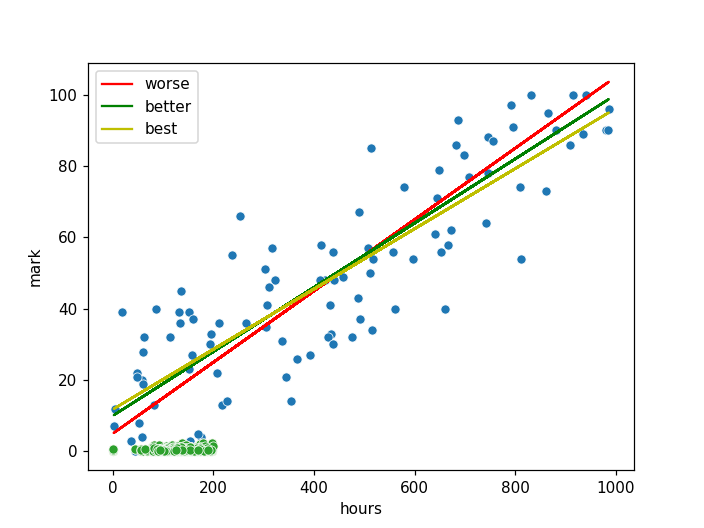

In [55]:
fig, ax = plt.subplots()
sns.scatterplot(x=data["hours"], y=data["mark"])

plt.plot(data.hours, data.prediction_1, color='r', label='worse')
plt.plot(data.hours, data.prediction_2, color='g', label='better')
plt.plot(data.hours, data.best_prediction, color='y', label='best')

plt.legend()

If we wanted to check if the model is better according to our second criteria, we just compute:

In [56]:
data["error_best_bis"] = (data.mark - data.best_prediction).abs() < 5

In [58]:
data.error_best_bis.sum()

28

### Understanding lr attributes / methods

In [70]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis,best_prediction,best_prediction_error,error_best_bis
0,865,95,91.5,87.85,55.63,12.25,51.1225,1549.9969,True,False,84.77,104.6529,False
1,4,12,5.4,10.36,50.94,43.56,2.6896,1516.3236,False,True,12.12,0.0144,True
2,305,35,35.5,37.45,59.45,0.25,6.0025,597.8025,True,True,37.52,6.3504,True
3,437,56,48.7,49.33,41.59,53.29,44.4889,207.6481,False,False,48.65,54.0225,False
4,682,86,73.2,71.38,47.14,163.84,213.7444,1510.0996,False,False,69.33,277.8889,False


In [74]:
# lets predict for 2 students
lr.predict(np.array([[450], [330]]))

array([49.75074911, 39.6254046 ])

In [79]:
# lets predict for whole training dataset
lr.predict(data[["hours"]])[:10]

array([84.76756556, 12.11821866, 37.51595782, 48.65383679, 69.32641517,
       59.03231492, 42.74738582, 84.43005408, 16.75900156, 55.15093285])

`score` returns the coefficient of determination  
In the case of Linear Regression, it is exactly the correlation squared

In [80]:
lr.score(
    X=data[["hours"]],
    y=data.mark
)

0.7518130774464549

In [81]:
data[["hours", "mark"]].corr() ** 2

,hours,mark
hours,1.000000,0.751813
mark,0.751813,1.000000


We can evaluate other metrics on our model

In [82]:
from sklearn.metrics import mean_absolute_error

In [83]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,error_1_bis,error_2_bis,best_prediction,best_prediction_error,error_best_bis
0,865,95,91.5,87.85,55.63,12.25,51.1225,1549.9969,True,False,84.77,104.6529,False
1,4,12,5.4,10.36,50.94,43.56,2.6896,1516.3236,False,True,12.12,0.0144,True
2,305,35,35.5,37.45,59.45,0.25,6.0025,597.8025,True,True,37.52,6.3504,True
3,437,56,48.7,49.33,41.59,53.29,44.4889,207.6481,False,False,48.65,54.0225,False
4,682,86,73.2,71.38,47.14,163.84,213.7444,1510.0996,False,False,69.33,277.8889,False


In [86]:
mean_absolute_error(data.mark, data.best_prediction)

11.4026

In [87]:
mean_absolute_error(data.mark, data.prediction_2)

11.525799999999997

## Align with business to decide the optimal metric!!

In [88]:
data2 = pd.DataFrame({"boxes": [100, 150, 160, 90, 220], "pred_1": [105, 153, 172, 93, 244], "pred_2": [98, 146, 166, 88, 214]})

In [91]:
data2.head()

,boxes,pred_1,pred_2
0,100,105,98
1,150,153,146
2,160,172,166
3,90,93,88
4,220,244,214


In [92]:
data2["mse_1"] = (data2["boxes"] - data2["pred_1"]) ** 2
data2["mse_2"] = (data2["boxes"] - data2["pred_2"]) ** 2

In [93]:
data2.head()

,boxes,pred_1,pred_2,mse_1,mse_2
0,100,105,98,25,4
1,150,153,146,9,16
2,160,172,166,144,36
3,90,93,88,9,4
4,220,244,214,576,36


In [94]:
data2.mse_1.mean()

152.6

In [95]:
data2.mse_2.mean()

19.2

Estimate customer lifetime value (CLV)  
20 + 0.96 * 20 + 0.96 **2 * 20 + ...

In [107]:
20 / (1 - 0.96)

499.99999999999955

In [108]:
loss_demand = 3
# suppose we lose 1 of 2 clients if non-provided
loss_offer = 250

In [103]:
data2["loss_demand_1"] = (data2["pred_1"] - data2["boxes"]) * (data2["pred_1"] - data2["boxes"] > 0) * loss_demand

In [104]:
data2["loss_offer_1"] = (- data2["pred_1"] + data2["boxes"]) * (data2["pred_1"] - data2["boxes"] < 0) * loss_offer

In [105]:
data2["loss_demand_2"] = (data2["pred_2"] - data2["boxes"]) * (data2["pred_2"] - data2["boxes"] > 0) * loss_demand

In [106]:
data2["loss_offer_2"] = (- data2["pred_2"] + data2["boxes"]) * (data2["pred_2"] - data2["boxes"] < 0) * loss_offer

In [110]:
data2["loss_1"] = data2.loss_demand_1 + data2.loss_offer_1
data2["loss_2"] = data2.loss_demand_2 + data2.loss_offer_2

In [111]:
data2

,boxes,pred_1,pred_2,mse_1,mse_2,loss_demand_1,loss_offer_1,loss_demand_2,loss_offer_2,loss_1,loss_2
0,100,105,98,25,4,15,0,0,500,15,500
1,150,153,146,9,16,9,0,0,1000,9,1000
2,160,172,166,144,36,36,0,18,0,36,18
3,90,93,88,9,4,9,0,0,500,9,500
4,220,244,214,576,36,72,0,0,1500,72,1500


In [113]:
data2.loss_1.sum()

141

In [112]:
data2.loss_2.sum()

3518